# Xiaobo He <font color='blue'> Score: 38/40 </font>

#### <font color='blue'> Please see the corresponding cells for comments (in blue) on each individual question, if there's any. </font>

# MTH9879 Homework 6 Solution

Assigned: March 22, 2016.
Due: April 5, 2016 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\EE}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cI}{\mathcal{I}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\cM}{\mathcal{M}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Tai-Ho Wang (tai-ho.wang@baruch.cuny.edu) and Jim Gatheral (jim.gatheral@baruch.cuny.edu) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color="blue">If you encounter problems with Markdown/LaTeX or iPython notebook, please contact Yuxi Liu, who has kindly offered to help.


### 0. (0 points) 
Read the review article by McAleer and Medeiros and also the nice article by Barndorff-Nielsen et al.

## Comparison of estimators

### Download RV estimator code

In [1]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/tq.zip", destfile="tq.zip")
unzip(zipfile="tq.zip")
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/RvEstimators.R.zip", destfile="RvEstimators.R.zip")
unzip(zipfile="RvEstimators.R.zip")

### 1. (12 points)  <font color=blue> Score: 12/12 </font>
This assignment uses the *tqBAC* dataset from *tq.rData* and the RV estimators from *RvEstimators.R*.

In [2]:
load('tq.rData')
library(highfrequency)
library(xts)
library(zoo)
source('RvEstimators.R')

(a) Consider the BAC trade price series.  Superimpose signature plots of the following estimators with subsampling frequency $q$ from 1 to 20: ZHOU, TSRV, MSRV, KRVTH, KRVC.  Express your results as $\sqrt{RV}$ to make them more intuitive, as in Table 1 of Lecture 6 (recall that volatility estimates should be of the order of $2\%$!).
<br>
Pay attention to good aesthetics, addling a proper legend to your plot.

(b) Repeat part (a) for the BAC mid-quote series.

(c) Which of these estimators do you recommend and why?  What sub-sampling frequency do you recommend based on these pictures?

### 1. Solution


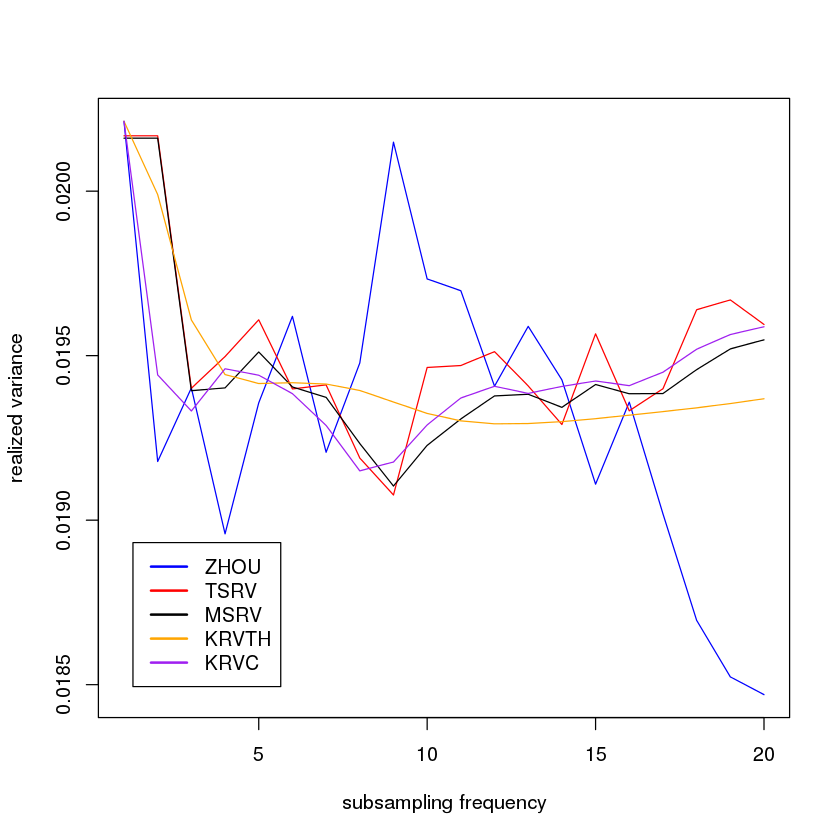

In [3]:
# (a) realized variance estimators
px <- tqBAC$PRICE
p <- as.numeric(px)

sub_f <- 20
rvZHOU  <- sapply(1:sub_f, function(q){sqrt(ZHOU(log(p),q))})
rvTSRV  <- sapply(1:sub_f, function(q){sqrt(TSRV(log(p), q))})
rvMSRV  <- sapply(1:sub_f, function(q){sqrt(MSRV(log(p), q))})
rvKRVTH <- sapply(1:sub_f, function(q){sqrt(KRVTH(log(p), q))})
rvKRVC  <- sapply(1:sub_f, function(q){sqrt(KRVC(log(p), q))})

plot(1:sub_f, rvZHOU,type = "l", col = "blue", xlab="subsampling frequency", ylab="realized variance")
lines(1:sub_f, rvTSRV,  col = "red")
lines(1:sub_f, rvMSRV,  col = "black")
lines(1:sub_f, rvKRVTH, col = "orange")
lines(1:sub_f, rvKRVC,  col = "purple")

legend("bottomleft", c("ZHOU","TSRV","MSRV","KRVTH","KRVC"), col=c("blue","red","black","orange", "purple"), lwd=2, inset=0.05)

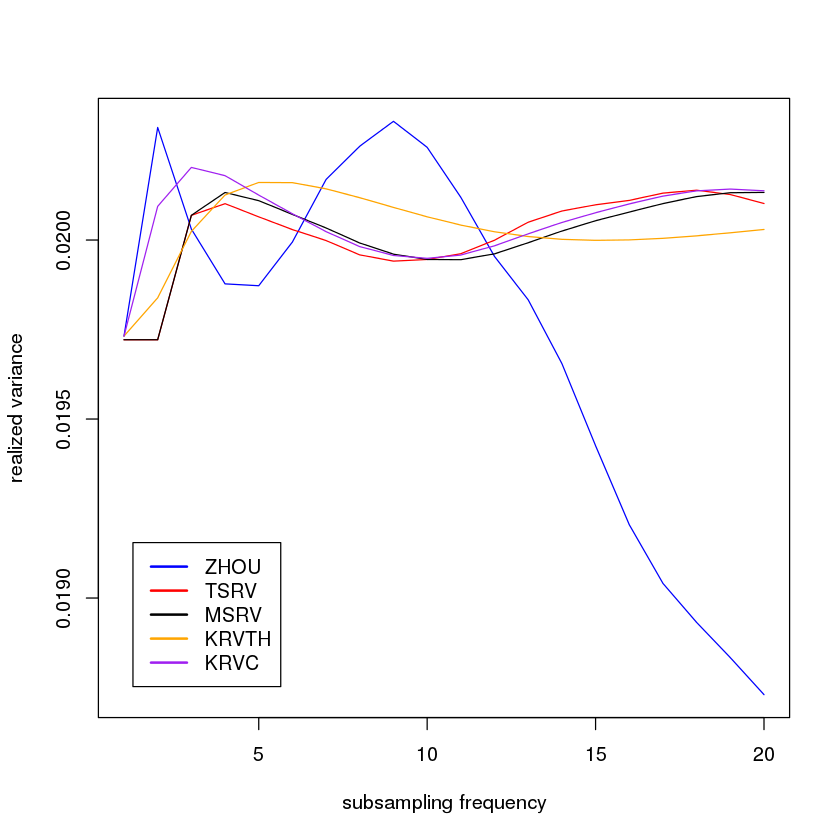

In [4]:
#(2) Repeat part (a) for the BAC mid-quote series
bid_px <- as.numeric(tqBAC$BID)
ask_px <- as.numeric(tqBAC$OFR)
mid_px <- (bid_px + ask_px)/2

sub_f <- 20
rvZHOU  <- sapply(1:sub_f, function(q){sqrt(ZHOU(log(mid_px),q))})
rvTSRV  <- sapply(1:sub_f, function(q){sqrt(TSRV(log(mid_px), q))})
rvMSRV  <- sapply(1:sub_f, function(q){sqrt(MSRV(log(mid_px), q))})
rvKRVTH <- sapply(1:sub_f, function(q){sqrt(KRVTH(log(mid_px), q))})
rvKRVC  <- sapply(1:sub_f, function(q){sqrt(KRVC(log(mid_px), q))})

plot(1:sub_f, rvZHOU,type = "l", col = "blue", xlab="subsampling frequency", ylab="realized variance")
lines(1:sub_f, rvTSRV,  col = "red")
lines(1:sub_f, rvMSRV,  col = "black")
lines(1:sub_f, rvKRVTH, col = "orange")
lines(1:sub_f, rvKRVC,  col = "purple")

legend("bottomleft", c("ZHOU","TSRV","MSRV","KRVTH","KRVC"), col=c("blue","red","black","orange", "purple"), lwd=2, inset=0.05)


### (3)
Based on the pictures, I would recommend KRVTH, which is the smoothest one and converges fast. For KRVTH, subsampling frequency would be q = 15.

<br>

<font color=blue>
All of the estimators seem to perform pretty similarly except for Zhou which is clearly not as good on this dataset.  A sub-sampling frequency of 5 seems about right.  At this sub-sampling frequency, the differences between trade-based and quote-based estimates is minimized.
</font>

## The Epps effect

### 2. (14 points) <font color=blue> Score: 13/14 </font>
For this assignment, use the *tqBAC* and  *tqC* datasets from *tq.rData*, the function *getSymbols* from the *quantmod* package, and the function *aggregatets* from the * highfrequency* package.

In [2]:
load('tq.rData')
library(highfrequency)
library(quantmod)
library(TTR)

(a) Write a function to aggregate a *tq* object (such as *tqBAC*) to the nearest $k$ seconds. <br>
(Hint: Use the function *aggregatets(.)*).

(b) Write a function to compute the correlation between two high-frequency log return series (in *tq* format) where the underlying prices have been aggregated to the nearest $k$ seconds.

(c) Plot the correlation between BAC and C returns where these returns are sampled every $k$ seconds, with $ k  \in \{2,3,4,. .., 599,600\} $.  Use a kernel smoothing function such as *ksmooth* to smooth your results.  Make sure the aesthetics are good with nice labels etc.

(d)  Is your plot consistent with the Epps effect?  What was the intraday correlation between BAC and C returns on 04-May-2012?

(e) Use the function *getSymbols* from *quantmod* to download daily data for BAC and C from 01-Jan-2012 to 31-Dec-2012.  What was the historical correlation of daily BAC and C returns over that period?

### 2 Solution

In [3]:
# (a)
aggr_tq <- function(tq, sec){
    return (aggregatets(tq, on="seconds", k=sec))
}

In [4]:
# (b)
corr_tq <- function(tq1, tq2, sec){
    aggr1 <- aggr_tq(tq1, sec)
    aggr2 <- aggr_tq(tq2, sec)
    r_1 <- diff(log(aggr1))[-1]
    r_2 <- diff(log(aggr2))[-1]
    
    return(cor(r_1, r_2))
}

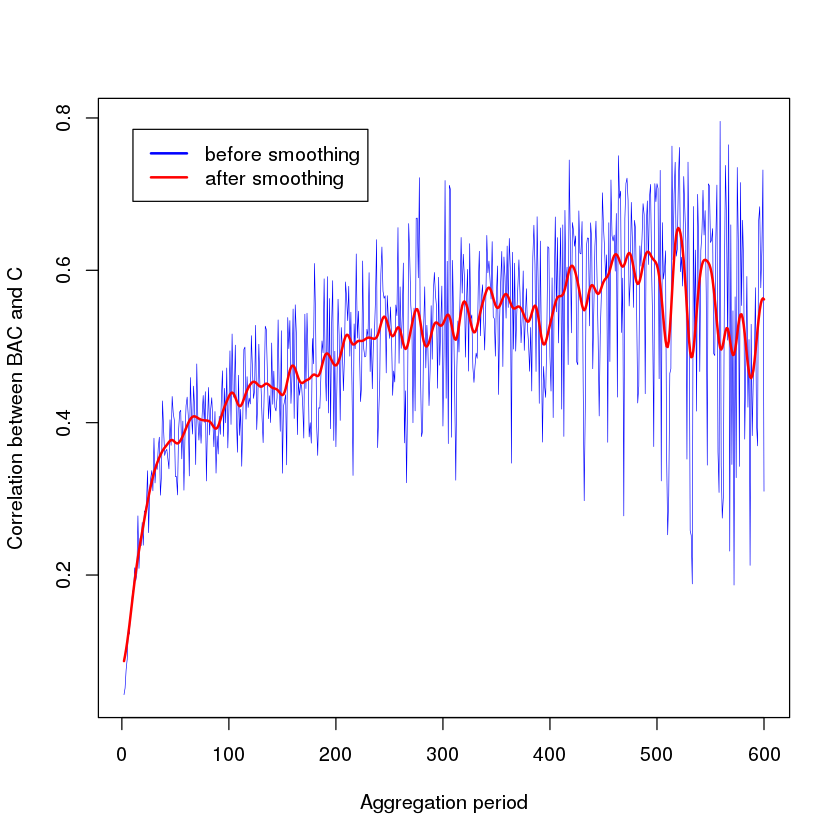

In [5]:
# (c)
sec_nn <- 600
tq1 <- tqBAC$PRICE
tq2 <- tqC$PRICE

corr = sapply(2:sec_nn, function(k){corr_tq(tq1,tq2,k)})
plot(2:sec_nn, corr, col='blue', type = "l",lwd=0.5, xlab = "Aggregation period", 
     ylab = "Correlation between BAC and C")

lines(ksmooth(2:sec_nn, corr, "normal", bandwidth = 10), col="red", type="l", lwd=2)

legend("topleft", c("before smoothing", "after smoothing"), col=c("blue","red"), lwd=2, inset=0.05)

### (d)
The plot consistent with the Epps effect since the estimator is larger while sampling frequency increasing. 

The intraday correlation between BAC and C returns on 04-May-2012 is around 0.5. 

<font color=blue> (1pt off) Why?

In [7]:
#(e)
dataBAC <- getSymbols("BAC", src = "yahoo", from = "2012-01-01", to = "2012-12-31")
dataC <- getSymbols("C"  , src = "yahoo", from = "2012-01-01", to = "2012-12-31")

px_BAC <- get(dataBAC)$BAC.Adjusted
px_C <- get(dataC)$C.Adjusted 

corr_his <- cor(diff(log(px_BAC))[-1], diff(log(px_C))[-1])
cat("The historical correlation of daily BAC and C returns over that period is: \n")
print(corr_his)


The historical correlation of daily BAC and C returns over that period is: 
             C.Adjusted
BAC.Adjusted  0.7999082


## The Hayashi-Yoshida estimator

### 3. (2 points)  <font color=blue> Score: 2/2 </font>
Show that when two time series $p^{(1)}$ and $p^{(2)}$ are synchronous, the Hayashi-Yoshida estimator coincides with the realized covariance estimator.

### <font color=blue> Solution. </font>
When the two time series are synchronous,

$$
v_{ij}={\bf 1}_{[t_{i-1},t_i] \cap [t_{j-1},t_j] \neq \emptyset} = \delta_{ij}
$$

so

\begin{eqnarray*}
HY_t &=& \sum_{i \leq t}\,\sum_{j \leq t}\,(p^{(1)}_i-p^{(1)}_{i-1})\,(p^{(2)}_j-p^{(2)}_{j-1})\,v_{ij}\\
&=& \sum_{i \leq t}\,(p^{(1)}_i-p^{(1)}_{i-1})\,(p^{(2)}_i-p^{(2)}_{i-1})
\end{eqnarray*}

which is just the realized covariance estimator.


## Fulvio Corsi's HAR-RV model

The following code loads the data of SPX realized volatility required for this problem. Data were downloaded from the Oxford-Man website

In [5]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/spx_krv.rData_.zip", destfile="spx_krv.zip")
unzip(zipfile="spx_krv.zip")
load("spx_krv.rData")

In [6]:
data.frame(head(spx.krv))

,head.spx.krv.
2000-01-03,0.0001607266
2000-01-04,0.0002643965
2000-01-05,0.0003046503
2000-01-06,0.0001485821
2000-01-07,0.000123267
2000-01-10,0.0001306934


### 4. (12 points) <font color=blue> Score: 11/12 </font>

(a) Rerun the HAR-RV example code using the 2008 *DJI_RV* sample from the *highfrequency* package.

(b) Repeat the analysis of part (a) with *spx.krv* restricted to 2008.

(c) Tabulate the HAR-RV coefficients for the two 2008 datasets.  Are they similar or do they differ?  Is most weight on the 1-day, 5-day, or 22-day RV?

(d) Using *quantmod* download daily VIX data.  Subset this data to 2008 and plot ${\rm VIX}^2$.

(e)  Plot SPX RV and superimpose DJI RV for 2008. Superimpose a plot of $\text{VIX}^2$, adding a scale on the right hand axis (see how this is done in the lecture iPython notebook). Comment on the resulting plot.


### 4 Solution


Call:
"RV1 = beta0  +  beta1 * RV1 +  beta2 * RV5 +  beta3 * RV22"

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0017683 -0.0000626 -0.0000427 -0.0000087  0.0044331 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
beta0 4.432e-05  3.695e-05   1.200   0.2315    
beta1 1.586e-01  8.089e-02   1.960   0.0512 .  
beta2 6.213e-01  1.362e-01   4.560 8.36e-06 ***
beta3 8.721e-02  1.217e-01   0.716   0.4745    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0004344 on 227 degrees of freedom
Multiple R-squared:  0.4679,	Adjusted R-squared:  0.4608 
F-statistic: 66.53 on 3 and 227 DF,  p-value: < 2.2e-16



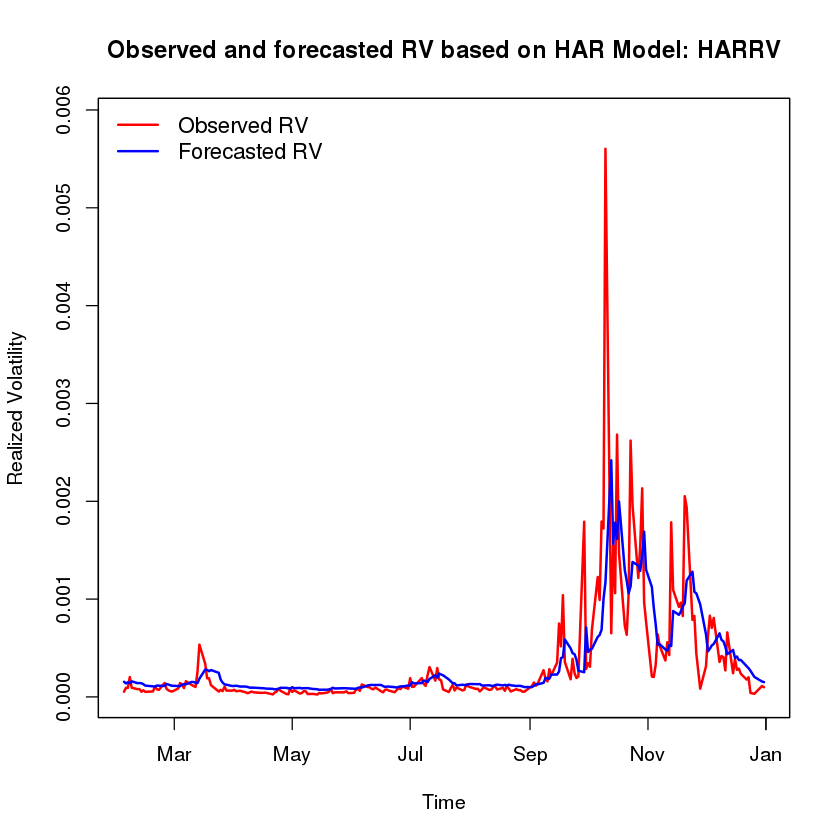

In [7]:
#(a)
data(realized_library);
DJI_RV <- realized_library$Dow.Jones.Industrials.Realized.Variance; 

DJI_RV <- DJI_RV[!is.na(DJI_RV)]
DJI_RV <- DJI_RV['2008']

x <- harModel(data=DJI_RV , periods = c(1,5,22), RVest = c("rCov"), type="HARRV",h=1, transform=NULL)
plot(x)
print(summary(x))


Call:
"RV1 = beta0  +  beta1 * RV1 +  beta2 * RV5 +  beta3 * RV22"

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0022396 -0.0001219 -0.0000725 -0.0000176  0.0079141 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
beta0 7.164e-05  5.960e-05   1.202  0.23067    
beta1 1.523e-01  8.218e-02   1.853  0.06526 .  
beta2 5.512e-01  1.415e-01   3.896  0.00013 ***
beta3 1.501e-01  1.324e-01   1.134  0.25801    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0006787 on 220 degrees of freedom
Multiple R-squared:  0.4096,	Adjusted R-squared:  0.4015 
F-statistic: 50.87 on 3 and 220 DF,  p-value: < 2.2e-16



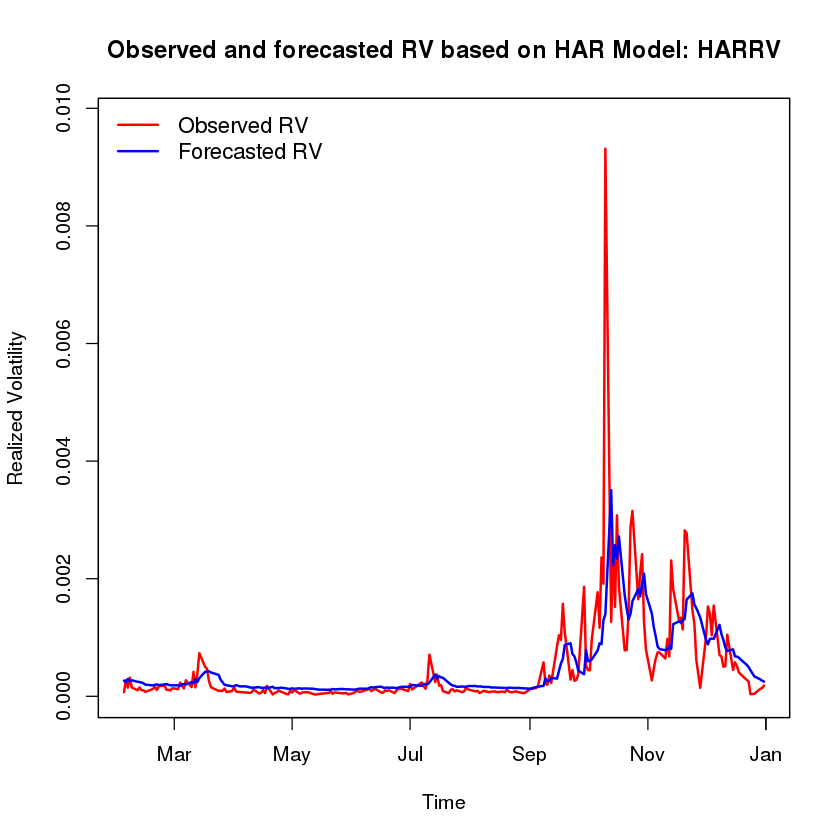

In [8]:
#(b)

spx.krv <- spx.krv[!is.na(spx.krv)]
spx.krv <- spx.krv['2008']

x <- harModel(data=spx.krv , periods = c(1,5,22), RVest = c("rCov"), type="HARRV",h=1, transform=NULL)
plot(x)
print(summary(x))

### (c)

|   Coef     |  DJI RV   |  SPX KRV  |
|------------|-----------|-----------|
| $\beta_0$  | 4.432e-05 | 7.164e-05 |
| $\beta_1$  | 1.586e-01 | 1.523e-01 |
| $\beta_2$  | 6.213e-01 | 5.512e-01 |
| $\beta_3$  | 8.721e-02 | 1.501e-01 |

They are pretty similar. The most weight is on the 5-day RV.

In [11]:
library(quantmod)

[1] "VIX"

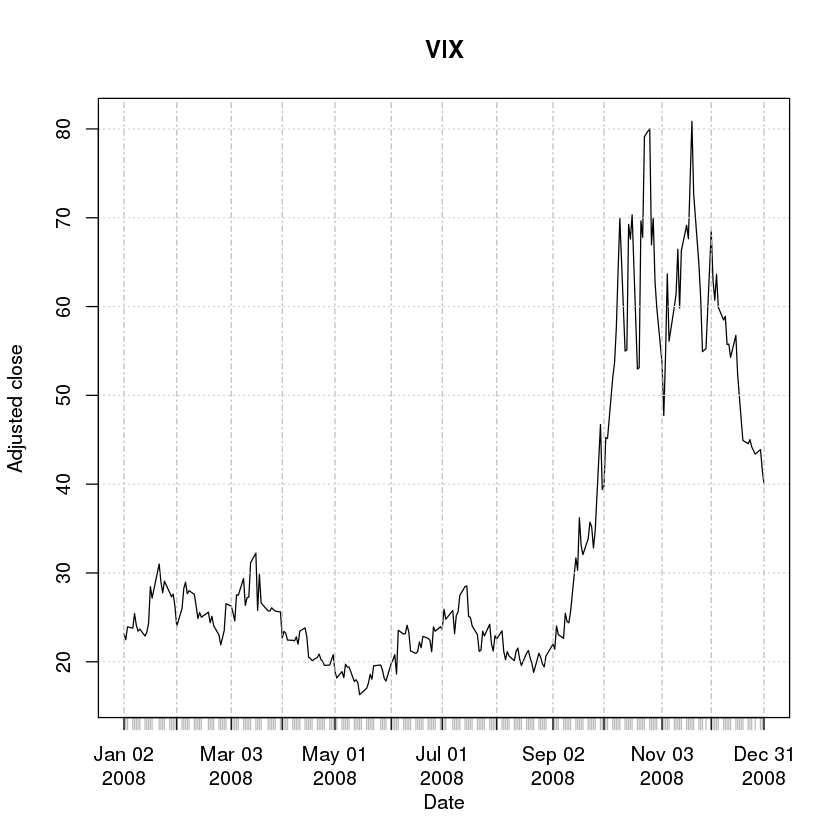

In [13]:
#(d)
getSymbols("^VIX", src = "yahoo", from = "2008-01-01", to = "2008-12-31")

plot(VIX$VIX.Adjusted, main = "VIX", ylab="Adjusted close", xlab="Date")

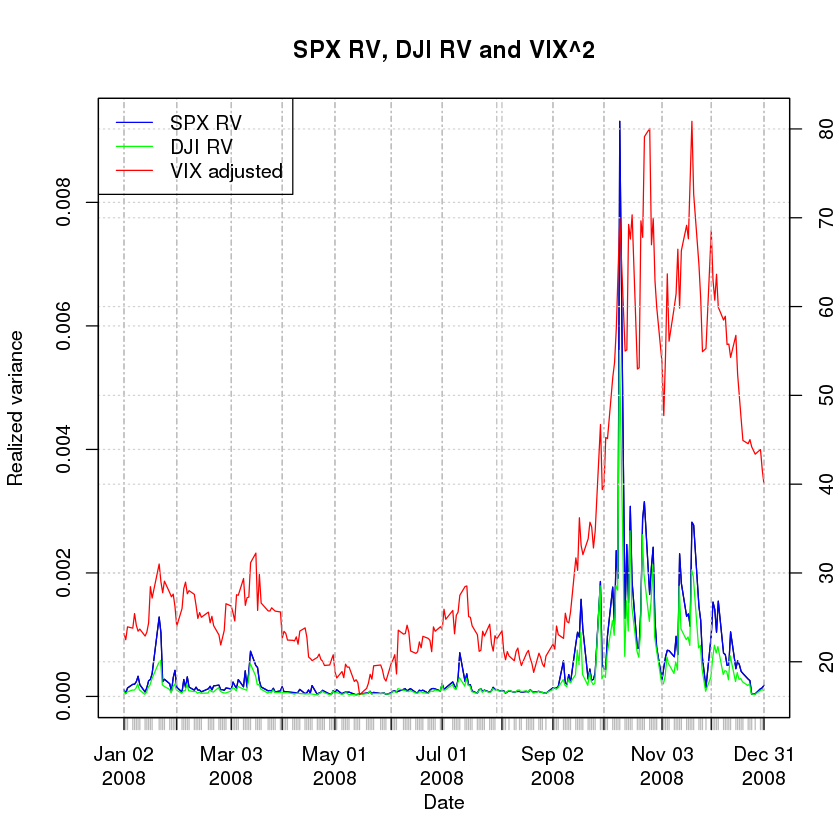

In [14]:
#(e)

plot(spx.krv, main="SPX RV, DJI RV and VIX^2", ylab="Realized variance", xlab="Date")
lines(spx.krv, col="blue")
lines(DJI_RV, col="green")

par(new = T)
plot(VIX$VIX.Adjusted, col="red", axes=F, main=NA, xlab=NA, ylab=NA)

axis(side = 4)
mtext(side = 4, line = 3, "VIX^2")
legend("topleft",legend=c("SPX RV ","DJI RV", "VIX adjusted"),col=c("blue", "green", "red"),lwd=c(1,1))



<font color=blue>(1pt off) Comments on the plot?